Преподаватель: Олег Булыгин
Домашнее задание http://prntscr.com/ujddtw


1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК


100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Линейная регрессия — метод восстановления зависимости между двумя переменными. 
РЕГРЕССИЯ – предсказание одной переменной на основании другой. Одна переменная – независимая, а другая – зависимая.

Коэффициент детерминации
доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными
 


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import seaborn as sns

In [55]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


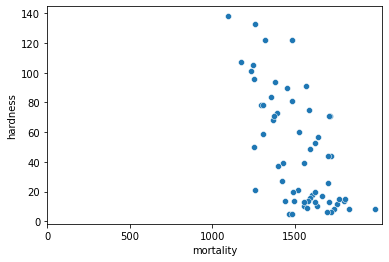

In [56]:
g=sns.scatterplot(data=df,x='mortality',y='hardness')
g.set_xticks(range(0,2000,500))


In [58]:
df[['mortality', 'hardness']].corr(method='pearson')  #Pearson

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [60]:
df[['mortality', 'hardness']].corr(method='spearman') #Spearman


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [72]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()
model.fit(np.array(df['mortality']).reshape((-1,1)),np.array(df['hardness']))

 

LinearRegression()

In [87]:
model.score(np.array(df['mortality']).reshape((-1,1)),np.array(df['hardness']))

0.4288267193124973

In [88]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [89]:
X_const = sm.add_constant(np.array(df['mortality']).reshape((-1,1)))

In [90]:
model = sm.OLS(np.array(df['hardness']), X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           1.03e-08
Time:                        22:13:40   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [91]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 2.49776928e+02 -1.32924533e-01]
R2:  0.42882671931249716


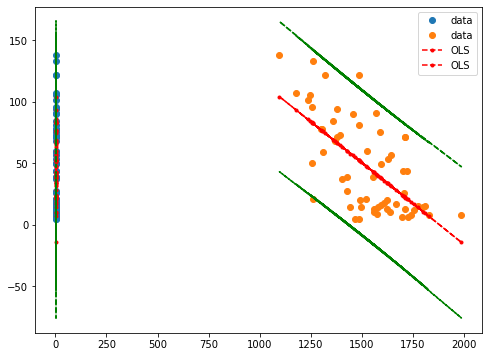

In [92]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const, np.array(df['hardness']), 'o', label="data")
ax.plot(X_const, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const, iv_u, 'g--')
ax.plot(X_const, iv_l, 'g--')
ax.legend(loc='best');

In [67]:
X_const[:,1]

array([1247., 1668., 1466., 1800., 1609., 1558., 1807., 1299., 1637.,
       1359., 1392., 1755., 1519., 1307., 1254., 1491., 1555., 1428.,
       1318., 1260., 1723., 1379., 1742., 1574., 1569., 1096., 1591.,
       1402., 1772., 1828., 1704., 1702., 1581., 1309., 1259., 1427.,
       1724., 1175., 1486., 1456., 1696., 1236., 1711., 1444., 1591.,
       1987., 1495., 1369., 1257., 1587., 1713., 1557., 1640., 1709.,
       1625., 1625., 1527., 1627., 1486., 1485., 1378.])

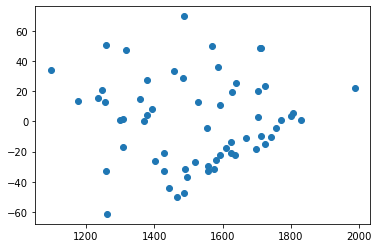

In [68]:
plt.scatter(X_const[:,1], results.resid)

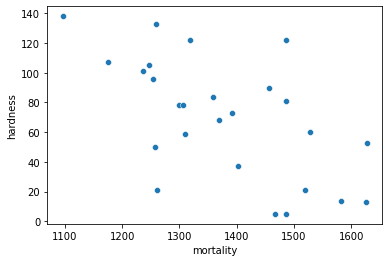

In [71]:
#South region 
s=sns.scatterplot(data=df_South,x='mortality',y='hardness')
g.set_xticks(range(0,2000,500))


In [52]:
df_South=df[df.location=='South'].reset_index(drop=True)
df_South.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,3,South,Birmingham,1466,5
2,8,South,Bournemouth,1299,78
3,10,South,Brighton,1359,84
4,11,South,Bristol,1392,73


In [69]:
df_South[['mortality', 'hardness']].corr(method='pearson')  #Pearson

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [70]:
df_South[['mortality', 'hardness']].corr(method='spearman') #Spearman

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [74]:
model = LinearRegression()
model.fit(np.array(df_South['mortality']).reshape((-1,1)),np.array(df_South['hardness']))

LinearRegression()

In [75]:
model.score(np.array(df_South['mortality']).reshape((-1,1)),np.array(df_South['hardness']))

0.3625885624364601

In [76]:
X_const = sm.add_constant(np.array(df_South['mortality']).reshape((-1,1)))

In [77]:
model = sm.OLS(np.array(df_South['hardness']), X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Mon, 14 Jun 2021   Prob (F-statistic):            0.00113
Time:                        22:10:19   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

In [78]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 3.08317671e+02 -1.73261990e-01]
R2:  0.3625885624364602


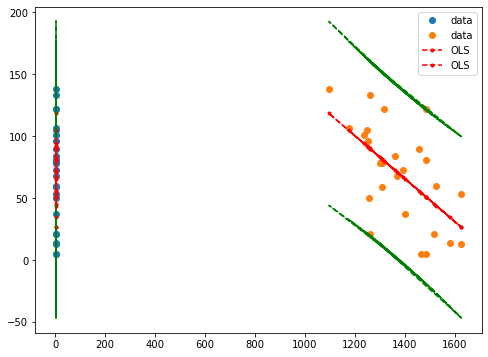

In [81]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const, np.array(df_South['hardness']), 'o', label="data")
ax.plot(X_const, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const, iv_u, 'g--')
ax.plot(X_const, iv_l, 'g--')
ax.legend(loc='best');

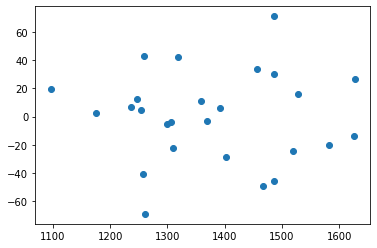

In [82]:
plt.scatter(X_const[:,1], results.resid)

In [80]:
df_North=df[df.location=='North'].reset_index(drop=True)
df_North.head()

,Unnamed: 0,location,town,mortality,hardness
0,2,North,Birkenhead,1668,17
1,4,North,Blackburn,1800,14
2,5,North,Blackpool,1609,18
3,6,North,Bolton,1558,10
4,7,North,Bootle,1807,15


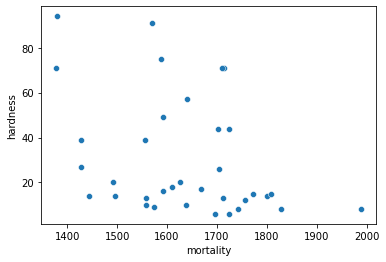

In [93]:
s=sns.scatterplot(data=df_North,x='mortality',y='hardness')
g.set_xticks(range(0,2000,500))

In [94]:
df_North[['mortality', 'hardness']].corr(method='pearson')  #Pearson

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [95]:
df_North[['mortality', 'hardness']].corr(method='spearman') #Spearman

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [96]:
model = LinearRegression()
model.fit(np.array(df_North['mortality']).reshape((-1,1)),np.array(df_North['hardness']))


LinearRegression()

In [97]:
model.score(np.array(df_North['mortality']).reshape((-1,1)),np.array(df_North['hardness']))

0.1358643664207173

In [98]:
X_const = sm.add_constant(np.array(df_North['mortality']).reshape((-1,1)))

In [99]:
model = sm.OLS(np.array(df_North['hardness']), X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Mon, 14 Jun 2021   Prob (F-statistic):             0.0293
Time:                        22:23:46   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

In [100]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.45319062e+02 -7.03471243e-02]
R2:  0.1358643664207171


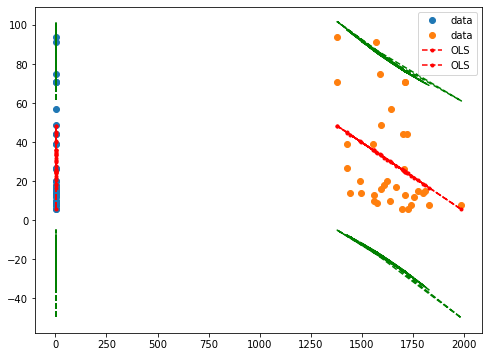

In [101]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const, np.array(df_North['hardness']), 'o', label="data")
ax.plot(X_const, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const, iv_u, 'g--')
ax.plot(X_const, iv_l, 'g--')
ax.legend(loc='best');

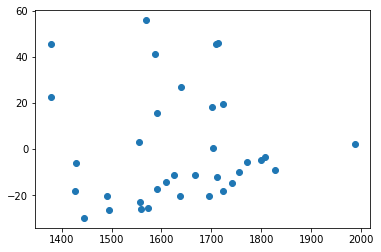

In [102]:
plt.scatter(X_const[:,1], results.resid)